In [1]:
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # Enable retina display

In [2]:
font_size = 20
plt.rcParams['axes.titlesize'] = font_size
plt.rcParams['axes.labelsize'] = font_size

plt.rcParams['xtick.labelsize'] = font_size - 3
plt.rcParams['ytick.labelsize'] = font_size - 3

plt.rcParams['font.family'] = 'DejaVu Sans'

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['lines.linewidth'] = 3

# Example 01: Single Plot

As a first example, we will examine the graph of the Lorentz distribution in a single plot. The Lorentzian distribution is given by:

$f(x; x_{0}, \gamma) = \Large\frac{1}{\pi}\frac{\gamma}{(x - x_{0})^{2} + \gamma^{2}}$

where $x_{0}$ is the location parameter, specifying the location of the peak of the distribution, and $\gamma$ is the scale parameter which specifies the half-width at half-maximum (HWHM). Alternatively, $2\gamma$ is the full width at half maximum (FWHM).

In [3]:
def Lorentzian(x, x_0, gamma):
    return gamma / (np.pi * ((x - x_0)**2 + gamma**2))


x = np.linspace(-5, 5, 200)

L1 = Lorentzian(x, x_0=0, gamma=0.5)
L2 = Lorentzian(x, x_0=0, gamma=1.0)
L3 = Lorentzian(x, x_0=-2, gamma=1.0)

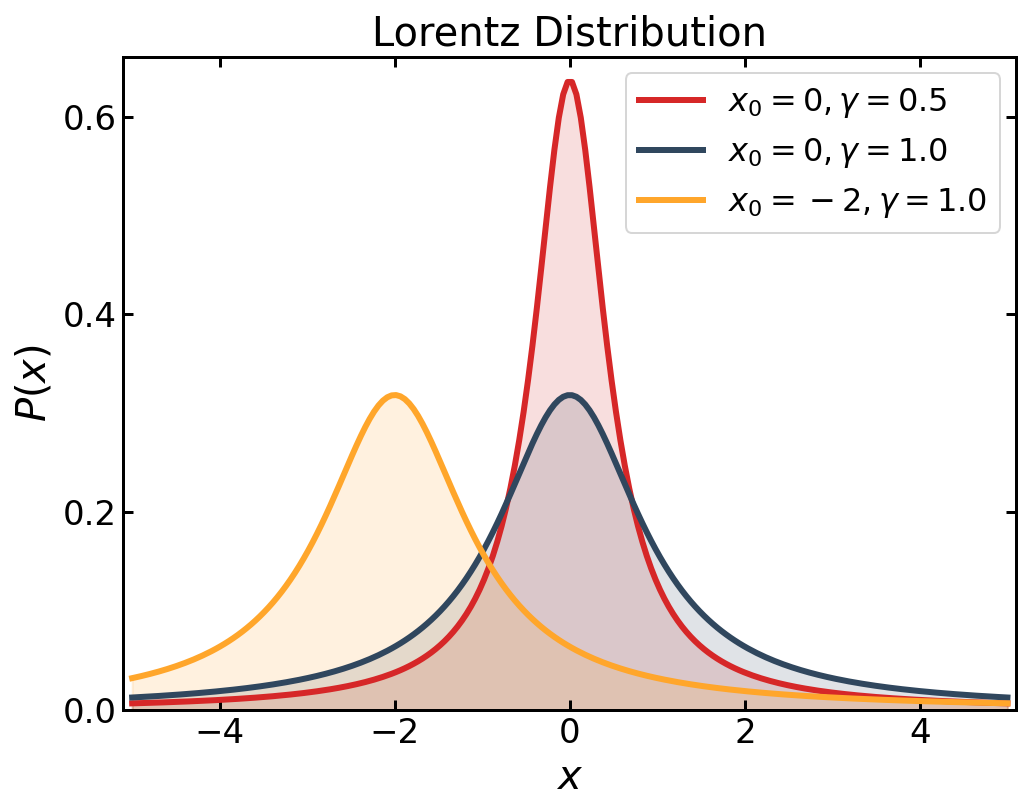

In [4]:
colors = ['tab:red', '#30475e', '#ffa62b']
labels = ['$x_{0} = 0, \gamma = 0.5$',
          '$x_{0} = 0, \gamma = 1.0$',
          '$x_{0} = -2, \gamma = 1.0$']

fig, ax = plt.subplots(figsize=(8, 6))

for index, y in enumerate([L1, L2, L3]):
    ax.plot(x, y, color=colors[index], ls='-', marker='', label=labels[index])
    ax.fill_between(x, y, 0, color=colors[index], alpha=0.15)

ax.set(title='Lorentz Distribution', xlabel='$x$', ylabel='$P(x)$')

ax.legend(frameon=True, fontsize=font_size - 4, loc='upper right')

# Customise the two axes
ax.set_xlim([-5.1, 5.1])
ax.set_xticks([-4, -2, 0, 2, 4])

ax.set_ylim([0, 0.66])
ax.set_yticks([0.0, 0.2, 0.4, 0.6])

wd = 1.5
ax.tick_params(length=5, width=wd)  # Set the tick parameters (length + width)

for axis in ['top', 'bottom', 'left', 'right']:  # Control the axis linewidth
    ax.spines[axis].set_linewidth(wd)

<br>

# Example 02: Multiple Subplots

The second example focuses on creating multiple (in our case two) subplots in a single figure. The top panel (a) will depict a sine wave without any damping, while the bottom one (b) will show the [effect of damping](https://en.wikipedia.org/wiki/Damping).  

In [5]:
def undamped_sine(t, amp, omega, phi):
    return amp * np.cos(omega * t + phi)


def damped_sine(t, amp, omega, phi, lambda_):
    return amp * np.cos(omega * t + phi) * np.exp(-lambda_ * t)


t = np.linspace(0, 5, 100)

amp = 1
omega = 2 * np.pi
phi = 0
lambda_ = 1

y_undamped = undamped_sine(t, amp, omega, phi)
y_damped = damped_sine(t, amp, omega, phi, lambda_)
envelope_up = amp * np.exp(-lambda_ * t)
envelope_down = -amp * np.exp(-lambda_ * t)

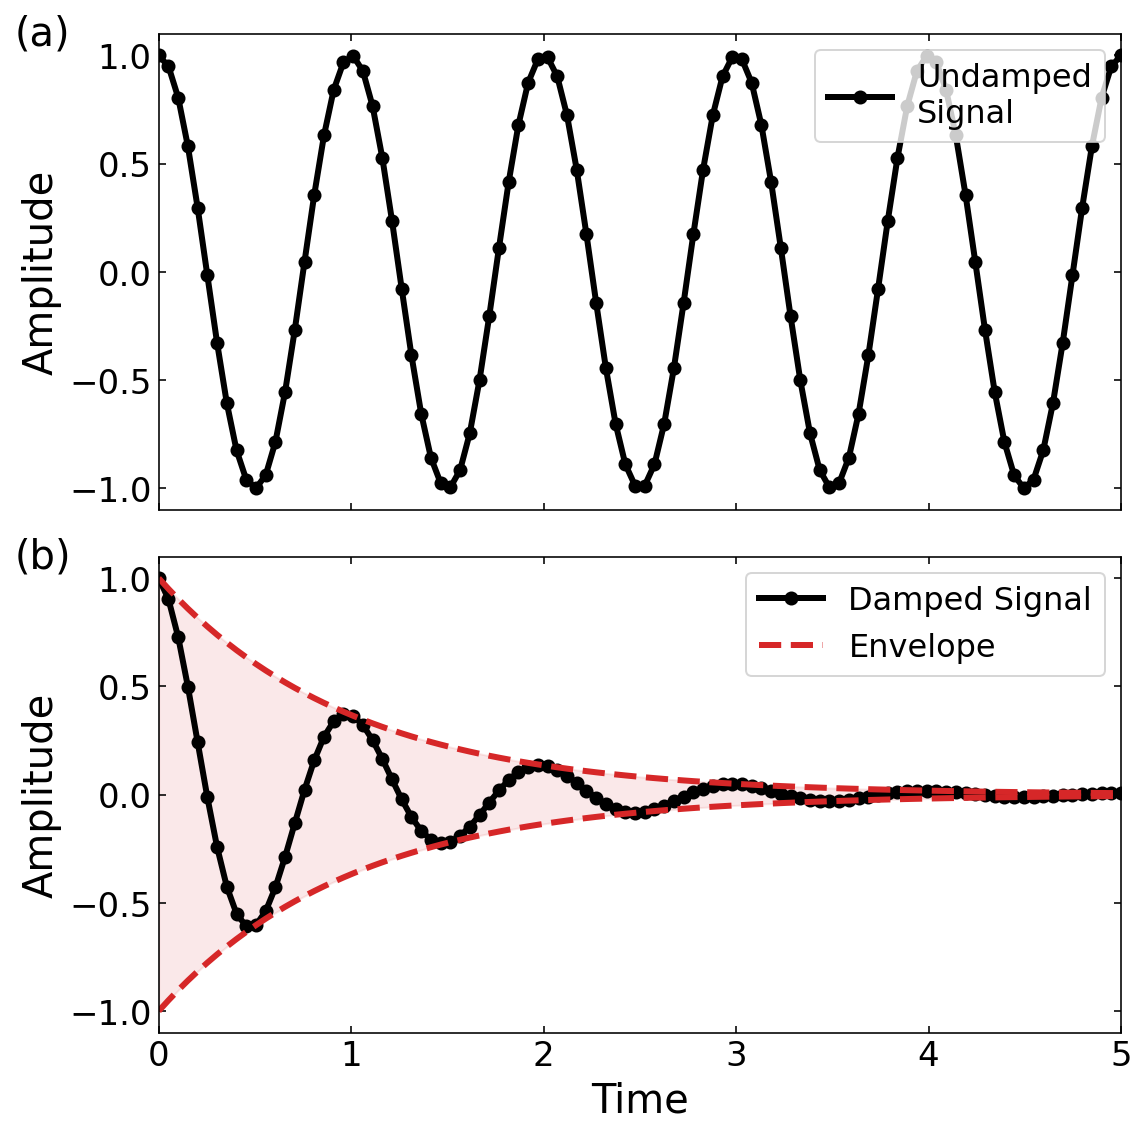

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

#  Top subplot - ax1
ax1.plot(t, y_undamped, color='k', ls='-', marker='o', label='Undamped\nSignal')

ax1.set(ylabel='Amplitude')

#  Bottom subplot - ax2
ax2.plot(t, y_damped, color='k', ls='-', marker='o', label='Damped Signal')
ax2.plot(t, envelope_up, color='tab:red', ls='--', label='Envelope')
ax2.plot(t, envelope_down, color='tab:red', ls='--')
ax2.fill_between(t, envelope_up, envelope_down, color='tab:red', alpha=0.1)

ax2.set(xlabel='Time', ylabel='Amplitude')

#  Show legends in both subplots
for ax in [ax1, ax2]:
    ax.legend(fontsize=font_size - 4, loc='upper right')

#  Customise both subplots
ax1.autoscale(axis='x', tight=True)

ax1.text(-0.75, 1.05, '(a)', size=font_size)
ax2.text(-0.75, 1.05, '(b)', size=font_size)

fig.tight_layout()

<br>